# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aqu√≠](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. M√°s informaci√≥n sobre el dataset [aqu√≠](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploraci√≥n de datos y Procesamiento del Lenguaje Natural

Ded√≠cale un buen tiempo a hacer un An√°lisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, ser√° dif√≠cil completar este an√°lisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¬øqu√© palabras est√°n asociadas a calificaciones positivas y qu√© palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la cr√≠tica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¬øes un problema de Clasificaci√≥n o de Regresi√≥n?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Eval√∫a de forma apropiada sus resultados. Justifica la m√©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperpar√°metros de tu modelo.
1. Intenta responder la pregunta: ¬øQu√© informaci√≥n est√° usando el modelo para predecir?

**Recomendaci√≥n:** si no te resulta conveniente trabajar en espa√±ol con NLTK, te recomendamos que explores la librer√≠a [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¬øValdr√° la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar √∫nicamente las etiquetas Positiva y Negativa a cada cr√≠tica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qu√© situaci√≥n puede ser √∫til. ¬øEsperas que el desempe√±o sea mejor o peor?
1. ¬øHay algo que te gustar√≠a investigar o probar?

### **¬°T√≥mate tiempo para investigar y leer mucho!**

---------

# 1. An√°lisis Exploratorio de Datos

## 1.1 Librer√≠as y bases de datos
Importamos las librer√≠as requeridas para el desarrolllo del proyecto.

In [1]:
import pandas as pd
import numpy as np 
import prettytable as pt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importamos la librer√≠a Natural Language Tokenizer
import nltk

#Diccionario de stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))

Importamos las bases de datos: *dev*, *test* y *train* de los reviews de productos de amazon.

In [3]:
dev = pd.read_json('dataset_es_dev.json', lines = True)
test = pd.read_json('dataset_es_test.json', lines = True)
train = pd.read_json('dataset_es_train.json', lines = True)
sets = [dev,test,train]

## 1.2 Exploraci√≥n general de los datos

Iniciamos revisando los features y tama√±o de los diferentes sets de datos.

In [67]:
cols = pt.PrettyTable()
cols.add_column('DEV', dev.columns.tolist())
cols.add_column('TEST', test.columns.tolist())
cols.add_column('TRAIN', train.columns.tolist())
print(cols)

+------------------+------------------+------------------+
|       DEV        |       TEST       |      TRAIN       |
+------------------+------------------+------------------+
|    review_id     |    review_id     |    review_id     |
|    product_id    |    product_id    |    product_id    |
|   reviewer_id    |   reviewer_id    |   reviewer_id    |
|      stars       |      stars       |      stars       |
|   review_body    |   review_body    |   review_body    |
|   review_title   |   review_title   |   review_title   |
|     language     |     language     |     language     |
| product_category | product_category | product_category |
+------------------+------------------+------------------+


In [68]:
sizes = pt.PrettyTable()
sizes.add_column('DEV', dev.shape)
sizes.add_column('TEST', test.shape)
sizes.add_column('TRAIN', train.shape)
print(sizes)

+------+------+--------+
| DEV  | TEST | TRAIN  |
+------+------+--------+
| 5000 | 5000 | 200000 |
|  8   |  8   |   8    |
+------+------+--------+


Como observaci√≥n inicial revisamos las primeras 5 instancias del dataset *dev* . Donde observamos los id del producto, reviewer y review, la cantidad de estrellas el t√≠tulo y descripci√≥n del review, el lenguaje y la categor√≠a del producto.

In [69]:
dev.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devoluci√≥n   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilic√© las brocas de menor di√°metro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

El feature de lenguaje tiene un √∫nico valor de *es*, indicando el idioma espa√±ol. No se usar√°, as√≠ que se elimina.

In [70]:
print(dev['language'].value_counts(),'\n',train['language'].value_counts(),'\n',test['language'].value_counts())
dev.drop(['language'],axis=1,inplace=True)
train.drop(['language'],axis=1,inplace=True)
test.drop(['language'],axis=1,inplace=True)

es    5000
Name: language, dtype: int64 
 es    200000
Name: language, dtype: int64 
 es    5000
Name: language, dtype: int64


Con el objetivo de tener una idea general de los datasets, de los productos y de los promedios en cantidad de estrellas por set de datos para comparar con los resultados finales del modelo de predicci√≥n, se desarrollan las siguientes gr√°ficas:

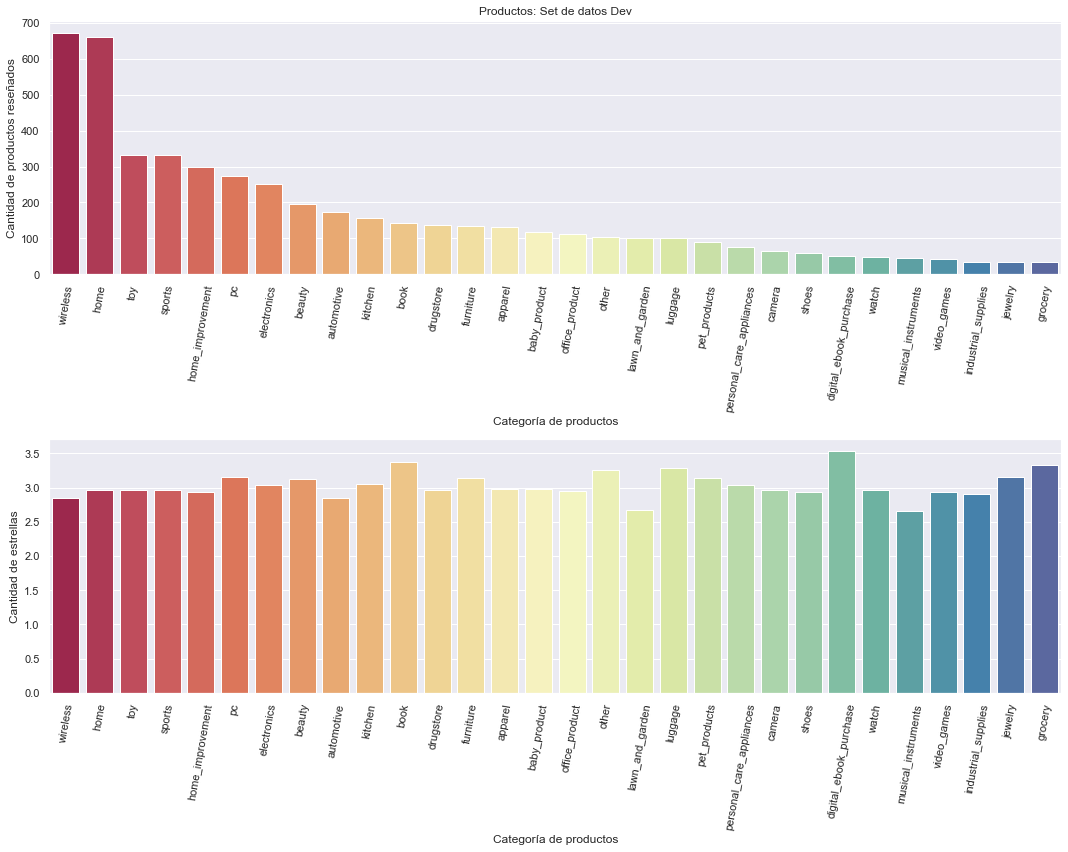

In [71]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_producto = dev['product_category'].value_counts();
promedio_estrellas = dev.groupby("product_category", as_index=False).mean()


sns.countplot(ax=axes[0], data=dev, x='product_category', palette="Spectral", order=categoria_producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_category", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de estrellas')
plt.tight_layout();

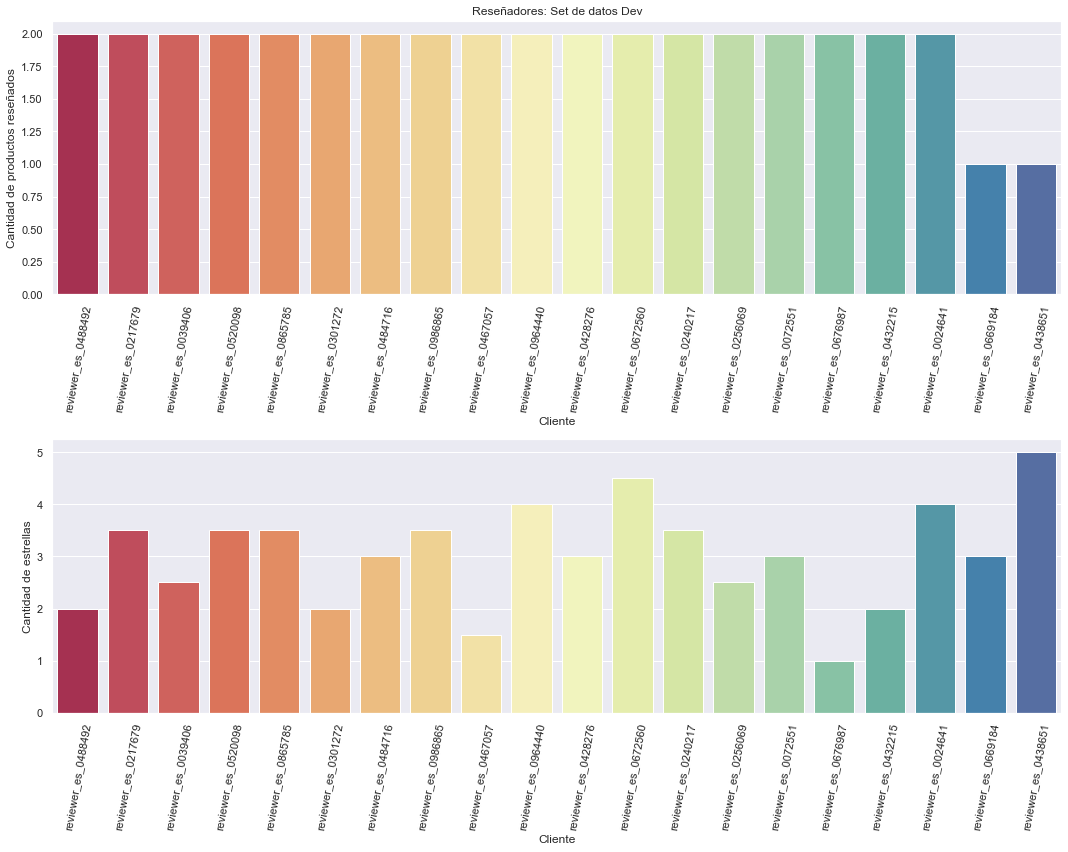

In [72]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_cliente = dev['reviewer_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.reviewer_id.isin(categoria_cliente.index)].groupby("reviewer_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='reviewer_id', palette="Spectral", order=categoria_cliente.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Cliente',ylabel='Cantidad de productos rese√±ados',title='Rese√±adores: Set de datos Dev')
sns.barplot(ax=axes[1], x = "reviewer_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_cliente.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Cliente',ylabel='Cantidad de estrellas')
plt.tight_layout();

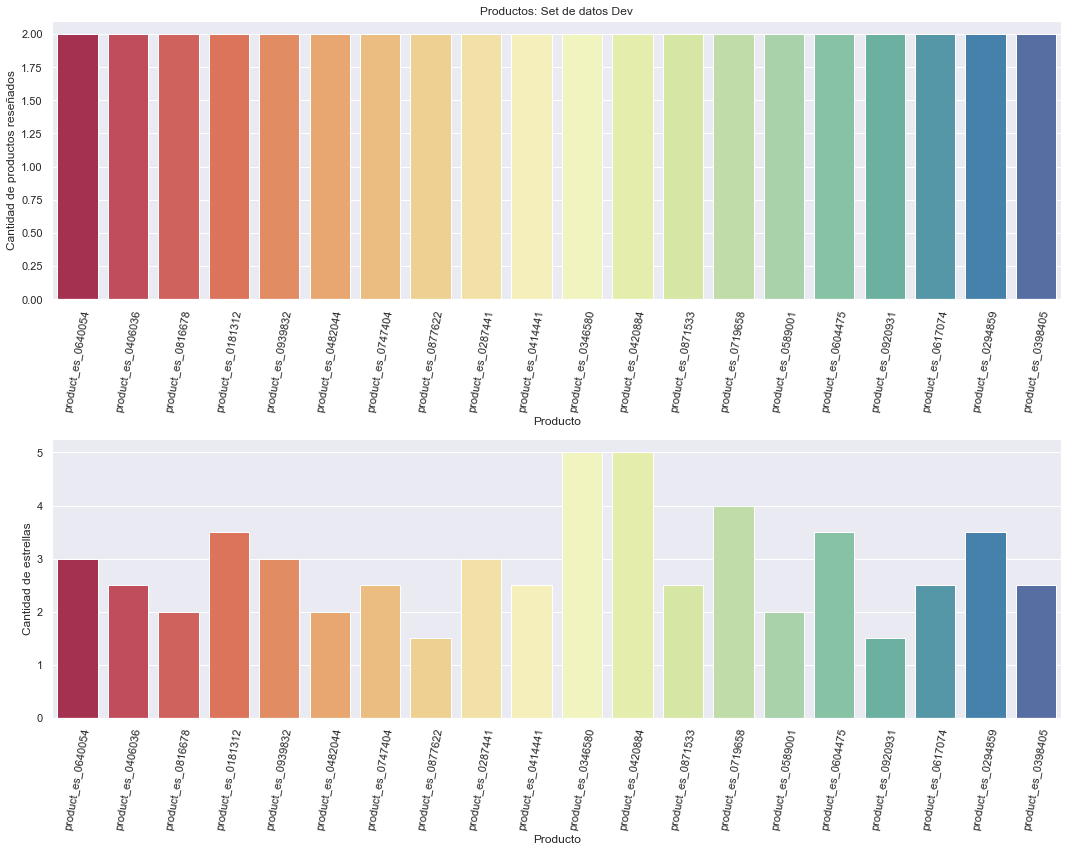

In [73]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
producto = dev['product_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.product_id.isin(producto.index)].groupby("product_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='product_id', palette="Spectral", order=producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Producto',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Producto',ylabel='Cantidad de estrellas')
plt.tight_layout();

Como podemos ver, el tipo de producto no tiene un efecto muy fuerte en la puntuaci√≥n promedio de este, la categor√≠a mejor puntuada en promedio son los eBoooks, cuya calidad es est√°ndar y su puntuacion depende de cuanto le guste al comprador el contenido. Y el rese√±ador o el producto tampoco son muy relevantes, ya que ambos tienen frecuencia m√°xima de 2 instancias: no hay rese√±adores con alto volumen de rese√±as ni positivas ni negativas que podr√≠an afectar el modelo con maneras de escribir espec√≠ficas a una sola persona, ni productos con muchos reviews que podrian afectar el modelo con palabras espec√≠ficas a ese producto.

Verificamos la distribuci√≥n  de estrellas en los set de datos:

In [74]:
dis_stars = pt.PrettyTable()
dis_stars.add_column('Estrellas', [1,2,3,4,5])
dis_stars.add_column('set Dev', dev.stars.value_counts().tolist())
dis_stars.add_column('set Train', train.stars.value_counts().tolist())
dis_stars.add_column('set Test', test.stars.value_counts().tolist())
print(dis_stars)

+-----------+---------+-----------+----------+
| Estrellas | set Dev | set Train | set Test |
+-----------+---------+-----------+----------+
|     1     |   1000  |   40000   |   1000   |
|     2     |   1000  |   40000   |   1000   |
|     3     |   1000  |   40000   |   1000   |
|     4     |   1000  |   40000   |   1000   |
|     5     |   1000  |   40000   |   1000   |
+-----------+---------+-----------+----------+


Las etiquetas est√°n perfectamente distribuidas, indicando que las entradas del modelo van a estar balanceadas.

Finalmente, revisamos la cantidad de palabras que tienen los reviews:

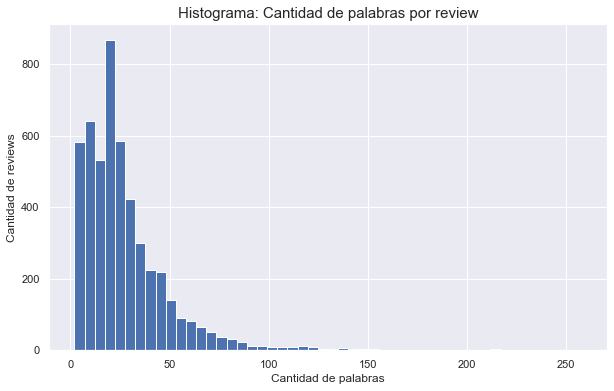

In [75]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes()
words_per_review = dev.review_body.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 50)
ax.set(xlabel='Cantidad de palabras',ylabel='Cantidad de reviews')
plt.title('Histograma: Cantidad de palabras por review', fontsize=15);

In [76]:
print('La cantidad promedio de palabras por review es de:',words_per_review.mean())

La cantidad promedio de palabras por review es de: 27.572


# 2. Procesamiento de Lenguaje Natural

## 2.1. Pre-procesamiento de los datos

Con el fin de normalizar todos los datos para su evaluaci√≥n se aplica la funci√≥n *.lower* para que todos los car√°cteres est√©n en min√∫scula y evitar errores en los siguientes pasos.

In [4]:
for set in sets:
    set.review_body = set.review_body.apply(lambda x: x.lower())
    set.review_title = set.review_title.apply(lambda x: x.lower())

In [78]:
test.head()

review_id          product_id          reviewer_id  stars  \
0  es_0038754  product_es_0113523  reviewer_es_0580071      1   
1  es_0748979  product_es_0017036  reviewer_es_0819733      1   
2  es_0411746  product_es_0138642  reviewer_es_0508607      1   
3  es_0786686  product_es_0170887  reviewer_es_0491157      1   
4  es_0429700  product_es_0710642  reviewer_es_0008745      1   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1              la mensajer√≠a horrible, no compro mas   
2  estoy muy decepcionado con el vendedor ya que ...   
3  mi valoraci√≥n no es sobre el producto sino sob...   
4  pues ten√≠a inter√©s en este libro y prob√© la ve...   

                                review_title        product_category  
0                                no me llego                wireless  
1   amazon sigue sin cumplir en las entregas                    home  
2                         estafa en el env√≠o                     toy  
3                           estafa de amazon                    home  
4  no consegu√≠ pasar de la portada en kindle  digital_ebook_purchase

Clasificamos los reviews como positivos para los que tienen 4 o 5 estrellas y negativos para los que tienen 3, 2 o 1 estrella.

In [5]:
for set in sets:
    set['binario'] = np.where(set.stars > 3, 1, 0)
    print(set['binario'].value_counts())

0    3000
1    2000
Name: binario, dtype: int64
0    3000
1    2000
Name: binario, dtype: int64
0    120000
1     80000
Name: binario, dtype: int64


## 2.2 Tokenizaci√≥n

Transformamos los reviews mediante un tokenizado para evaluar los comentarios por palabra. Adicionalmente eliminamos los caracteres especiales como signos de puntuaci√≥n y emojis.

In [6]:
def tokenizar(df):

	new_df = df[['review_id','stars','binario','review_body','review_title']]

	new_df['body_token'] = new_df.review_body.apply(lambda x: nltk.tokenize.word_tokenize(x))
	new_df['title_token'] = new_df.review_title.apply(lambda x: nltk.tokenize.word_tokenize(x))

	characters_list = new_df.body_token.apply(lambda x: [each for each in list(x) if not each.isalpha() and each != ' '])
	#characters_list = characters_list.append(new_df.review_title.apply(lambda x: [each for each in list(x) if not str(each).isalpha() and each != ' ']))
	characters = [item for sublist in characters_list for item in sublist]
	print('Caracteres especiales eliminados: ',np.unique(characters))

	for column in ['body_token', 'title_token']:
		for i in range(len(new_df.body_token)):
			new_df[column][i] = [word for word in new_df[column][i] if word not in characters]
			new_df[column][i] = [word for word in new_df[column][i] if word not in stopwords]

	return new_df

In [7]:
dev_token = tokenizar(dev)

Caracteres especiales eliminados:  ['!' '#' '%' "'" "''" "'tablet" '(' ')' '*' '+' '+++' ',' ',puede' '-'
 '-5' '-fregadero-' '-precio' '.' '..' '...' '....' '.....' '......'
 '.......' '........' '.........' '.aun' '.buen' '.con' '.creo' '.da'
 '.despu√©s' '.env√≠o' '.esta' '.faltaban' '.gracias' '.i' '.la' '.le' '.me'
 '.ni' '.no' '.pero' '.principios' '.se' '.un' '.vendedor' '.y' '/'
 '/precio' '0' '0,5' '0.' '0.1' '1' '1,2' '1,5' '1,60' '1,69' '1,70'
 '1,75' '1-2' '1.' '1.6.' '1/2' '1/4' '10' '10,1' '10-12' '10-15' '10.'
 '10/10' '10/100/1000' '100' '1000' '100x100' '100‚Ç¨' '1080' '10cm' '10mm'
 '10‚Ç¨' '11' '12' '125' '12m' '12v' '12¬∫' '13' '130' '135' '14' '15' '15,6'
 '15.6' '150' '150w' '150x190' '15h' '15min' '16' '16/05/2019' '160.'
 '16gb' '17' '18' '180' '180gr' '18kg' '18¬∫' '19' '19,95‚Ç¨' '19,99‚Ç¨' '1a'
 '1h' '1¬∞' '1¬∫' '1‚Ç¨' '2' '2,35' '2-3' '2-5' '2.' '2.4ghz' '2.5' '2/3' '20'
 '20,5' '200' '2000' '20000' '2001.' '2006' '2007.' '200w' '200‚Ç¨' '2011'
 '2011.' '201

Como resultado observamos que las columnas tokenizadas estan conformadas por listas de las palabras representativas de los comentarios, en min√∫sculas y sin signos de puntuaci√≥n:

In [82]:
dev_token.head(3)

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   

                                         review_body  \
0  malisimo, muy grande demasiado aparatoso y mal...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema, este no funcion...   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1                     [recibido, pedido, devoluci√≥n]   
2  [buscar, sistema, funciona, bien, abrazadera, ...   

                 title_token  
0             [mala, compra]  
1                 [recibido]  
2  [aprieta, bien, manillar]

## 2.3 Lemmatizaci√≥n

Evaluamos la librer√≠a Spacy para realizar la lemmatizaci√≥n:

In [8]:
import spacy
#spacy.prefer_gpu()
nlp = spacy.load("es_core_news_sm")

In [9]:
Lemma_prueba = pd.DataFrame(columns = ['Token','Token Text','Token Pos', 'Token Lemma'])
dev_token['body_lemma'] = dev_token.body_token.apply(lambda x: ' '.join(x))
doc = nlp(dev_token['body_lemma'][0])
for token in doc:
    Lemma_prueba = Lemma_prueba.append({'Token':token, 'Token Text':token.text, 'Token Pos':token.pos_,
    'Token Lemma':token.lemma_}, ignore_index=True)
print(Lemma_prueba)

       Token Token Text Token Pos Token Lemma
0   malisimo   malisimo      NOUN    malisimo
1     grande     grande       ADJ      grande
2  demasiado  demasiado       ADV   demasiado
3  aparatoso  aparatoso       ADJ   aparatoso
4        mal        mal       ADV         mal
5  protector  protector      NOUN   protector
6   pantalla   pantalla      VERB   pantallar


In [10]:
dev_token['body_lemma'] = dev_token.body_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])

In [11]:
dev_token['title_lemma'] = dev_token.title_token.apply(lambda x: ' '.join(x))
dev_token['title_lemma'] = dev_token.title_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])

In [87]:
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo, muy grande demasiado aparatoso y mal...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema, este no funcion...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1                     [recibido, pedido, devoluci√≥n]   
2  [buscar, sistema, funciona, bien, abrazadera, ...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4                [gusta, olor, viejo, aspecto, malo]   

                 title_token  \
0             [mala, compra]   
1                 [recibido]   
2  [aprieta, bien, manillar]   
3      [brocas, mantequilla]   
4                    [gusta]   

                                          body_lemma  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1                     [recibido, pedido, devoluci√≥n]   
2  [buscar, sistema, funcionar, bien, abrazaderar...   
3  [utilic√©, broca, menor, di√°metro, doblar, vari...   
4               [gustar, olor, viejo, aspecto, malo]   

                 title_lemma  
0             [malo, compra]  
1                 [recibido]  
2  [aprieta, bien, manillar]  
3      [broca, mantequillar]  
4                   [gustar]

## 2.4 An√°lisis de Frecuencia de las palabras

De acuerdo con el procesamiento anterior obtenemos una primera versi√≥n de la frecuencia de palabras que en general determinan si un comentario es positivo o negativo respecto a la clasficaci√≥n propuesta. Para analizar desarrollamos las gr√°ficas de frecuencia:

In [88]:
#Funci√≥n de frecuencias de las palabras
def get_freqs(df):

	# Separamos las rese√±as malas de las buenas
	df_malos = df.loc[df.stars.isin([1,2,3])]
	df_buenos = df.loc[df.stars.isin([4,5])]

	df_malos.reset_index(inplace= True)
	df_buenos.reset_index(inplace= True)

	# Guardamos todos los titulos y rese√±as buenos y malos en listas separadas
	df_malos_titulos = []
	df_malos_reviews = []
	for i in range(len(df_malos.review_title)):
		df_malos_titulos.append(df_malos.title_lemma[i])
		df_malos_reviews.append(df_malos.body_lemma[i])
	df_malos_titulos = [item for elem in df_malos_titulos for item in elem]
	df_malos_reviews = [item for elem in df_malos_reviews for item in elem]

	df_buenos_titulos = []
	df_buenos_reviews = []
	for i in range(len(df_buenos.review_title)):
		df_buenos_titulos.append(df_buenos.title_lemma[i])
		df_buenos_reviews.append(df_buenos.body_lemma[i])
	df_buenos_titulos = [item for elem in df_buenos_titulos for item in elem]
	df_buenos_reviews = [item for elem in df_buenos_reviews for item in elem]

	# Hacemos 4 dataframes con las frecuencias de las palabras
	df_malos_titulos_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_malos_titulos), orient = 'index')
	df_malos_titulos_freq['word'] = df_malos_titulos_freq.index
	df_malos_titulos_freq.sort_values(by = 0, ascending= False, inplace = True)

	df_malos_reviews_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_malos_reviews), orient = 'index')
	df_malos_reviews_freq['word'] = df_malos_reviews_freq.index
	df_malos_reviews_freq.sort_values(by = 0, ascending= False, inplace = True)

	df_buenos_titulos_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_buenos_titulos), orient = 'index')
	df_buenos_titulos_freq['word'] = df_buenos_titulos_freq.index
	df_buenos_titulos_freq.sort_values(by = 0, ascending= False, inplace = True)
	
	df_buenos_reviews_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_buenos_reviews), orient = 'index')
	df_buenos_reviews_freq['word'] = df_buenos_reviews_freq.index
	df_buenos_reviews_freq.sort_values(by = 0, ascending= False, inplace = True)

	return df_malos_titulos_freq, df_malos_reviews_freq, df_buenos_titulos_freq, df_buenos_reviews_freq

In [89]:
dev_mal_tit, dev_mal_rev, dev_buen_tit, dev_buen_rev = get_freqs(dev_token)

Graficamos lo resultados de frecuencias:

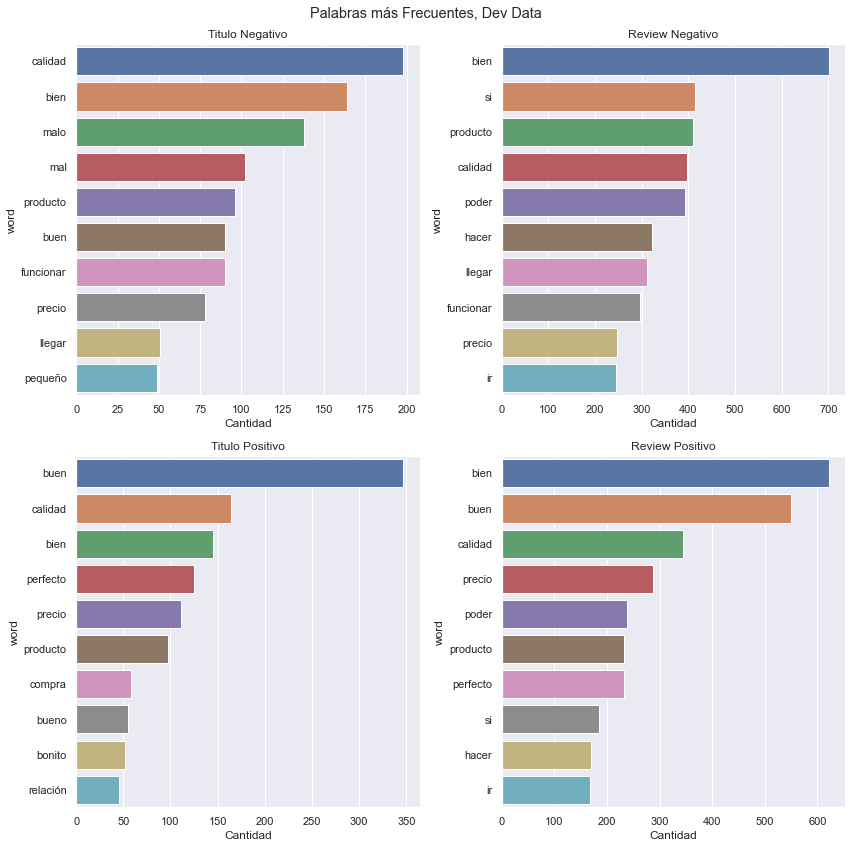

In [90]:
plt.figure(figsize= (12,12))
plt.suptitle('Palabras m√°s Frecuentes, Dev Data')

plt.subplot(221)
sns.barplot(x = dev_mal_tit[0][:10], y = dev_mal_tit.word[:10])
plt.title('Titulo Negativo')
plt.xlabel('Cantidad')

plt.subplot(222)
sns.barplot(x = dev_mal_rev[0][:10], y = dev_mal_rev.word[:10])
plt.title('Review Negativo')
plt.xlabel('Cantidad')

plt.subplot(223)
sns.barplot(x = dev_buen_tit[0][:10], y = dev_buen_tit.word[:10])
plt.title('Titulo Positivo')
plt.xlabel('Cantidad')

plt.subplot(224)
sns.barplot(x = dev_buen_rev[0][:10], y = dev_buen_rev.word[:10])
plt.title('Review Positivo')
plt.xlabel('Cantidad')

plt.tight_layout();

Las gr√°ficas demuestran que hay muchas palabras que son muy comunes en todos los reviews y que se repiten tanto en los comentarios positivos como en los negativos como por ejemplo *calidad* y *producto*;. Por tanto, se decide eliminar algunas de las palabras m√°s repetidas en todos los comentarios para evaluar unicamente las palabras representativas que permitan realizar la clasificaci√≥n.

In [12]:
all_lemmas = []
for i in range(len(dev_token.body_lemma)):
	all_lemmas.append(dev_token.body_lemma[i])
all_lemmas = [item for elem in all_lemmas for item in elem]

one_percentile = int(len(np.unique(all_lemmas)) * 0.01)

#1% de las palabras m√°s comunes del dataset
from collections import Counter
count_freq = Counter(all_lemmas).most_common(one_percentile)
count_notfreq = Counter(all_lemmas).most_common()[-one_percentile:]

In [13]:
a_remover = [word for word,val in count_freq[:20]] + [word for word,val in count_notfreq]

In [14]:
#C√≥digo para remover las palabras
dev_token.body_lemma = dev_token.body_lemma.apply(lambda x: [word for word in x if word not in a_remover])
dev_token.title_lemma = dev_token.title_lemma.apply(lambda x: [word for word in x if word not in a_remover])

De forma que las nuevas gr√°ficas resultante son las siguientes:

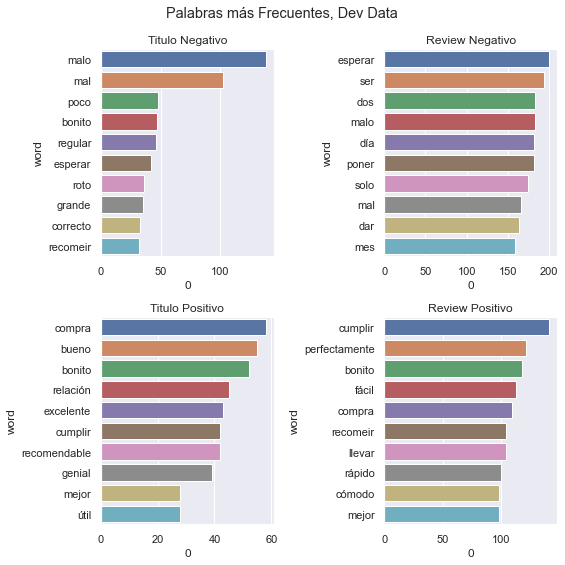

In [94]:
dev_mal_tit, dev_mal_rev, dev_buen_tit, dev_buen_rev = get_freqs(dev_token)

plt.figure(figsize= (8,8))
plt.suptitle('Palabras m√°s Frecuentes, Dev Data')

plt.subplot(221)
sns.barplot(x = dev_mal_tit[0][:10], y = dev_mal_tit.word[:10])
plt.title('Titulo Negativo')

plt.subplot(222)
sns.barplot(x = dev_mal_rev[0][:10], y = dev_mal_rev.word[:10])
plt.title('Review Negativo')

plt.subplot(223)
sns.barplot(x = dev_buen_tit[0][:10], y = dev_buen_tit.word[:10])
plt.title('Titulo Positivo')

plt.subplot(224)
sns.barplot(x = dev_buen_rev[0][:10], y = dev_buen_rev.word[:10])
plt.title('Review Positivo')

plt.tight_layout()
plt.show();

Verificamos que se eliminan las palabras m√°s comunes que no aportaban informaci√≥n valiosa a la clasificaci√≥n y nos quedamos con palabras m√°s significativas como: *recomendable* o *√∫til* para comentarios positivos, y *defectuoso* o *devolver* para comentarios negativos. Sumaremos las palabras del titulo a las del cuerpo para teenrlas todas en un mismo feature. 

In [15]:
dev_token['body_lemma'] = dev_token.body_lemma + dev_token.title_lemma

In [33]:
# Exportamos nuestro dataset transformado
#dev_token.to_csv('dataset_dev_token.csv')

# 3. Modelo de Machine Learning

## 3.1 Ingenier√≠a de Features

Con el dataset tokenizado, utilizaremos el cuerpo de los reviews y realizaremos modelos que clasifiquen los reviews de manera binaria y posteriormente en las 5 estrellas. Para esto definimos las palabras como vectores usando la estrategia Bag of Words que guarda para cada entrada un vector donde todas las palabras del corpus son una variable y el numero que la funcion le asigna es las veces que aparece en la rese√±a particular.

Transformamos el dataset asi:

In [16]:
#Ahora si, insumos para la prediccion
#dev_token = pd.read_csv('dataset_dev_token.csv')
data = dev_token[['body_lemma','stars','binario']]
data['body_lemma_joint'] = data.body_lemma.apply(lambda x: ' '.join(x))
data.head()

body_lemma  stars  binario  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...      1        0   
1           [recibido, pedido, devoluci√≥n, recibido]      1        0   
2  [buscar, sistema, abrazaderar, llevar, agarrar...      1        0   
3  [utilic√©, broca, menor, di√°metro, doblar, vari...      1        0   
4       [gustar, olor, viejo, aspecto, malo, gustar]      1        0   

                                    body_lemma_joint  
0  malisimo grande demasiado aparatoso mal protec...  
1                recibido pedido devoluci√≥n recibido  
2  buscar sistema abrazaderar llevar agarrar mani...  
3  utilic√© broca menor di√°metro doblar varios man...  
4              gustar olor viejo aspecto malo gustar

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizador=CountVectorizer(lowercase = False)
data_vec = vectorizador.fit_transform(data.body_lemma_joint)

# Tomamos las palabras
all_words = vectorizador.get_feature_names()

X_data = data_vec.toarray()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, data['binario'], test_size = 0.3, random_state=42)

In [107]:
# miramos que la distribuci√≥n haya quedado balanceada en train y test, como lo estaba en el original (60/40)
print(f'En train, tenemos {round((y_train.value_counts() / y_train.shape[0])[0]*100, 2)} % de reviews negativas y en test {(y_test.value_counts() / y_test.shape[0])[0]*100} %')

En train, tenemos 59.74 % de reviews negativas y en test 60.6 %


## 3.2 M√©tricas de Evaluaci√≥n

Definimos las siguientes funciones con las m√©tricas de evaluaci√≥n para los modelos.

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["Negativo","Positivo"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

## 3.3 Modelo Benchmark
Ahora, a partir de los resultados procesados y organizados, procedemos a aplicar los modelos de Machine Learning para obtener la clasificaci√≥n y n√∫mero de estrellas por comentario.

Iniciaremos estableciendo como Benchmark el modelo que mejor clasifique los reviews de manera binaria: buenos o malos. Para esto evaluaremos un random forest y una regresi√≥n log√≠stica, utilizando el dataset tokenizado y la columna binario previamente establecida en la que 4 y 5 estrellas hacen un buen review y 1, 2 o 3 hacen uno malo. 

### 3.3.1 Random Forest Classifier

Accuracy:  0.7346666666666667
RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)


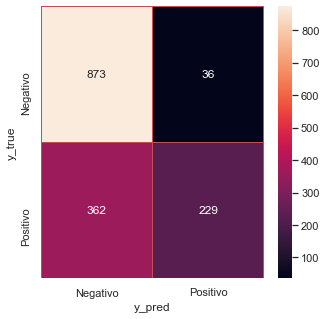

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10,20,50,70,100,150],
		  'max_depth': [2,5,7,10,25,20,30]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)

print("Accuracy: ",rfo.best_estimator_.score(X_test,y_test))
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_

y_pred = rfo.best_estimator_.predict(X_test)
confusion(y_test,y_pred)

Evaluaci√≥n de los reviews mal predichos

In [38]:
Errores_pos_rf = []
Errores_neg_rf = []
for i in range(1500):
    #print(y_test.iloc[i], y_pred[i])
    if y_test.iloc[i] != y_pred[i]:
        if y_test.iloc[i] == 0:
            Errores_neg_rf.append(y_test.index[i])
        else:
            Errores_pos_rf.append(y_test.index[i])
print(len(Errores_pos_rf))
print(len(Errores_neg_rf))

207
141


In [39]:
print(data.loc[Errores_neg_rf].groupby('stars').body_lemma.count())

stars
1    19
2    44
3    78
Name: body_lemma, dtype: int64


In [40]:
print(data.loc[Errores_pos_rf].groupby('stars').body_lemma.count())

stars
4    124
5     83
Name: body_lemma, dtype: int64


Se revisaran algunos de los reviews err√≥neamente predichos, para encontrar posibles mejoras a partir del visualizador de variables:

In [41]:
datos_neg = dev.iloc[Errores_neg_rf]
datos_pos = dev.iloc[Errores_pos_rf]

### 3.3.2 Regresi√≥n log√≠stica:

Accuracy:  0.7626666666666667
LogisticRegression(C=1, penalty='l1', solver='liblinear')


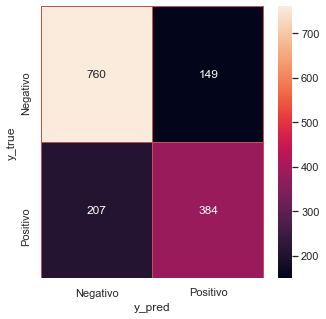

In [42]:
from sklearn.linear_model import LogisticRegression

params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],
		  'tol': [0.0001, 0.001, 0.01, 0.1]}
		  
lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)

print("Accuracy: ",lr_model.score(X_test,y_test))
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_

y_pred = lr_model.best_estimator_.predict(X_test)
confusion(y_test,y_pred)

In [43]:
Errores_pos_lr = []
Errores_neg_lr = []
for i in range(1500):
    #print(y_test.iloc[i], y_pred[i])
    if y_test.iloc[i] != y_pred[i]:
        if y_test.iloc[i] == 0:
            Errores_neg_lr.append(y_test.index[i])
        else:
            Errores_pos_lr.append(y_test.index[i])
print(len(Errores_pos_lr))
print(len(Errores_neg_lr))

207
149


In [44]:
print(data.loc[Errores_neg_lr].groupby('stars').body_lemma.count())

stars
1    20
2    51
3    78
Name: body_lemma, dtype: int64


In [45]:
print(data.loc[Errores_pos_lr].groupby('stars').body_lemma.count())


stars
4    123
5     84
Name: body_lemma, dtype: int64


In [46]:
datos_neg = datos_neg.append(dev.iloc[Errores_neg_lr])
datos_pos = datos_pos.append(dev.iloc[Errores_pos_lr])

Miramos para estos dos predictores, los reviews que fueron dif√≠ciles de predecir para ambos. Desde ya vemos que 3 y 4 estrellas fueron los peor predichos en sus grupos respectivos para ambos modelos, pero que la mayoria de errores est√° en la categoria de buenos reviews. Exploramos m√°s a countinuaci√≥n:

In [47]:
repetidos_neg = [review_id for review_id in datos_neg.review_id.value_counts().index if datos_neg.review_id.value_counts()[review_id] == 2]
reviews_datos_neg = datos_neg.loc[datos_neg.review_id.isin(repetidos_neg)].drop_duplicates()

In [48]:
repetidos_pos = [review_id for review_id in datos_pos.review_id.value_counts().index if datos_pos.review_id.value_counts()[review_id] == 2]
reviews_datos_pos = datos_pos.loc[datos_pos.review_id.isin(repetidos_pos)].drop_duplicates()

In [49]:
reviews_datos_neg.review_body[:10]

2468    esta bien, pero lo esperaba m√°s fuerte. de tod...
1600    no es realmente c√≥moda. aunque el dise√±o sea b...
486     son una mierda pero claro como lo pintan como ...
393     he comprado este producto en el mes de febrero...
2515    antes de sacarla a la playa ya de ha roto el a...
838     imagino que no supe transformar lo que necesitaba
2570    no est√° mal ; libro para entretenerte; es faci...
2633    muy contenta, fue f√°cil de montar y a mi gato ...
2138    positivo: lleg√≥ muy r√°pido el env√≠o. negativo:...
1090    despega el protector de silicona, no tiene cub...
Name: review_body, dtype: object

Observamos que estos reviews empiezan hablando de positivos antes de luego decir lo que no les gust√≥ del producto. Si laparte positiva del review tiene mayor extensi√≥n que la negativa, ser√° muy dificil que el modelo lo clasifique bien. 

Revisamos las reviews positivas tambien

In [50]:
reviews_datos_pos.review_body[:10]

3351    muy bien todas bien embaladas y llegaron antes...
3049    el producto lleg√≥ en plazo, en perfecto estado...
4066                               buen producto y precio
4684    est√° bastante bien para el precio que tiene, t...
4966    buena mochila bonito dise√±o y buenos materiale...
4635    rapido y perfecto para que no se salga la cortina
4395    no se empa√±an y tienen buena vision. la sujeci...
4257    lo utilizo a diario durante muchas horas para ...
4724     es un cuento muy divertido para los m√°s peque√±os
3321    buen producto y alimentaci√≥n para microfonos, ...
Name: review_body, dtype: object

CONCLUIR MAS SOBRE ESTO

In [51]:
words_per_review_general = dev.review_body.apply(lambda x: len(x.split(' ')))
words_per_review_malos = reviews_datos_neg.review_body.apply(lambda x: len(x.split(' ')))
words_per_review_buenos = reviews_datos_pos.review_body.apply(lambda x: len(x.split(' ')))

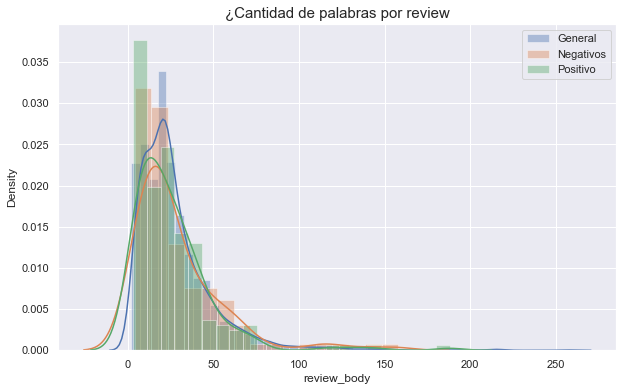

In [52]:
plt.figure(figsize = (10,6))
sns.distplot(words_per_review_general, kde=True, label = 'General')
sns.distplot(words_per_review_malos, kde=True, label = 'Negativos')
sns.distplot(words_per_review_buenos, kde=True, label = 'Positivo')
plt.legend()
plt.title('¬øCantidad de palabras por review', fontsize=15);

La longitud de las reviews es muy similar en todo el corpus y en las que clasifica mal, no se puede afirmar que este sea un factor relevante

## 3.4 Bigramas

Sabemos que el mejor modelo para tokens √∫nicos es un Logistic Regressor con Accuracy de  73.4%, intentaremos mejorar sobre este benchmark usando estos mismos modelos con bigramas en vez de unigramas.

In [161]:
# Generamos el dataset con los bigramas
new_vec = CountVectorizer(analyzer='word', ngram_range=(2, 2))
new_data_vec = new_vec.fit_transform(data.body_lemma_joint)
X_data = new_data_vec.toarray()

# Tomamos los bigramas unicos
all_bigrams = new_vec.get_feature_names()

Accuracy Random Forest:  0.6053333333333333


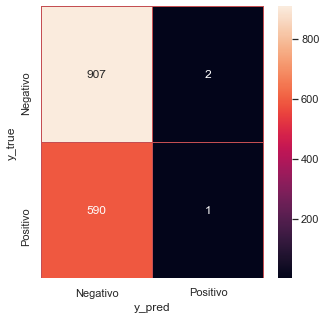

In [163]:
# Utilizamos el mejor estimador Random Forest, con esta nueva data
X_train, X_test, y_train, y_test = train_test_split(X_data, data['binario'], test_size = 0.3, random_state=42)
best_rf.fit(X_train,y_train)

print("Accuracy Random Forest: ",best_rf.score(X_test,y_test))

y_pred = best_rf.predict(X_test)
confusion(y_test,y_pred)

Accuracy Random Forest:  0.6393333333333333


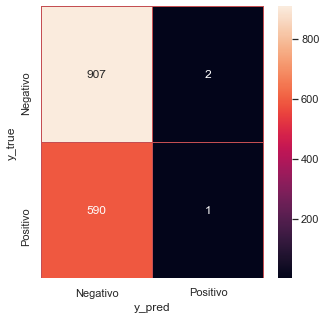

In [144]:
best_lr.fit(X_train,y_train)

print("Accuracy Random Forest: ",best_lr.score(X_test,y_test))
#print(rfo.best_estimator_)

y_pred = best_lr.predict(X_test)
confusion(y_test,y_pred)